In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
submission = pd.read_csv("Downloads/submission.csv")

In [3]:
test = pd.read_csv("Downloads/test.csv")

In [4]:
train = pd.read_csv("Downloads/train.csv")

In [5]:
train.head(5)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [6]:
test.head(5)

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [7]:
print("Number of Country/Region: ", train['Country/Region'].nunique())
print("Dates go from day", max(train['Date']), "to day", min(train['Date']), ", a total of", train['Date'].nunique(), "days")

Number of Country/Region:  163
Dates go from day 2020-03-18 to day 2020-01-22 , a total of 57 days


In [8]:
confirmed_country = train.groupby(['Country/Region']).agg({'ConfirmedCases':['sum']})
fatalities_country = train.groupby(['Country/Region']).agg({'Fatalities':['sum']})
confirmed_total_date = train.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date = train.groupby(['Date']).agg({'Fatalities':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

Text(0, 0.5, 'Number of cases')

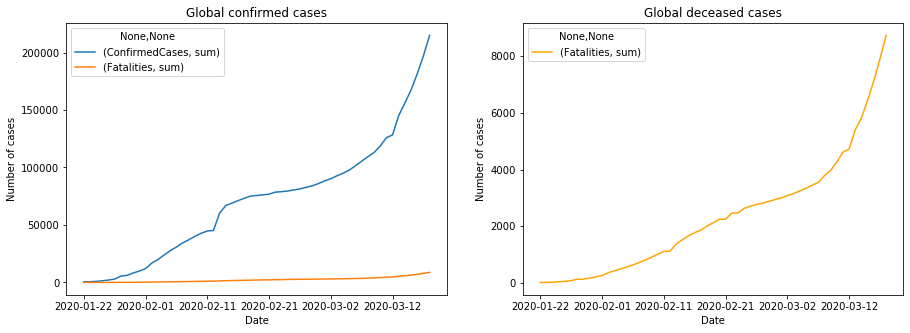

In [9]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases")
ax1.set_ylabel("Number of cases")
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases")
ax2.set_ylabel("Number of cases")

#  COVID-19 global tendency excluding india

In [10]:
confirmed_country_noIndia = train[train['Country/Region']!='India'].groupby(['Country/Region']).agg({'ConfirmedCases':['sum']})
fatalities_country_noIndia = train[train['Country/Region']!='India'].groupby(['Country/Region']).agg({'Fatalities':['sum']})
confirmed_total_date_noIndia = train[train['Country/Region']!='India'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_noIndia = train[train['Country/Region']!='India'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_noIndia = confirmed_total_date_noIndia.join(fatalities_total_date_noIndia)

Text(0, 0.5, 'Number of cases')

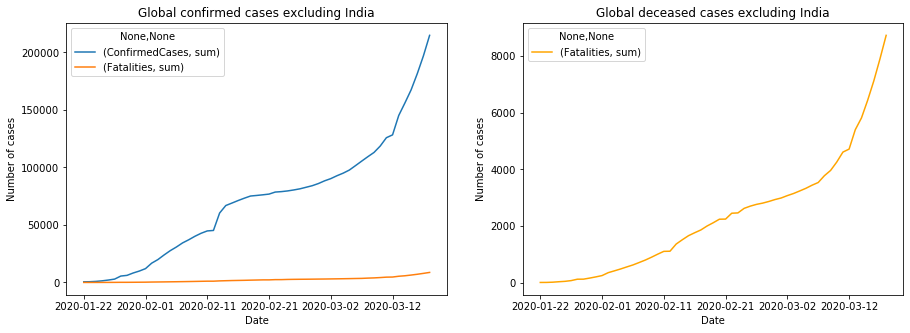

In [11]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
total_date_noIndia.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding India")
ax1.set_ylabel("Number of cases")
fatalities_total_date_noIndia.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding India")
ax2.set_ylabel("Number of cases")